# Assignment #1
Michael Ciniello,
Utor ID: qq201128 

# Step 1: Import data
1. check working directory
2. move data to directory
3. import data with pandas read_csv

In [3]:
# Check the working directory
import os
print(os.getcwd())

C:\Users\mciniello\Desktop\Data Science Fundementals\Statistics Class\Assignments


In [9]:
# Data has been saved in the approate folder. Time to upload!
import pandas as pd
import glob

# Write gob pattern because I always forget how to spell mosquito (and there is only one CSV file)
pattern = '*.csv'

# Save all file matches: csv_files
csv_files = glob.glob(pattern)
file = csv_files[0]

#upload
data = pd.read_csv(file,header=0)
print(data.info())


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 43 entries, 0 to 42
Data columns (total 2 columns):
Response     43 non-null int64
Treatment    43 non-null object
dtypes: int64(1), object(1)
memory usage: 768.0+ bytes
None


# Step 2: Investigate Data
1. Get value counts to understand size of each group
2. Run .describe() on each group

Beer     25
Water    18
Name: Treatment, dtype: int64
            beer      water
count  25.000000  18.000000
mean   23.600000  19.222222
std     4.133199   3.671120
min    17.000000  12.000000
25%    20.000000  16.500000
50%    24.000000  20.000000
75%    27.000000  22.000000
max    31.000000  24.000000


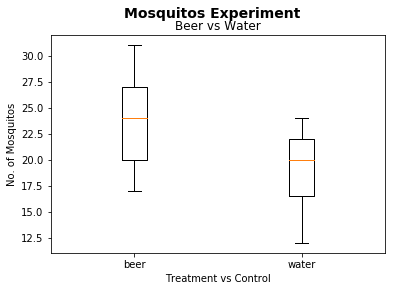

In [10]:
#Check value counts and means for each treatment
print(data.Treatment.value_counts())

#Create separate data sets
beer=data[data['Treatment']=='Beer'] 
water=data[data['Treatment']=='Water']
beer_water = [beer['Response'],water['Response']]

#Check out stats for beer vs water treatments (is there a better way to do this? .pivot()?)
beer_stats=beer.describe() 
water_stats=water.describe()
stats=pd.concat([beer_stats,water_stats],axis=1)
stats.columns = ['beer','water']
print(stats)

#create box plot 
import matplotlib.pyplot as plt
fig = plt.figure()
fig.suptitle('Mosquitos Experiment', fontsize=14, fontweight='bold')
ax = fig.add_subplot(111)
ax.boxplot(beer_water,labels= ['beer','water'])

ax.set_title('Beer vs Water')
ax.set_xlabel('Treatment vs Control')
ax.set_ylabel('No. of Mosquitos')

plt.show()


It appears that the 'beer' group has a higher mean, max, and min values. The interquartile range is also higher. This suggests that beer consumption does indeed increase a perons attractiveness to mosquitos. 

# Step 3: Randomize data and take samples
1. import random
2. create loop that takes randomizes list of response data
3. create separate beer and water list. get the means, and subtract!

In [6]:
import random

all_difs = []
for i in range(0,10000):
    response_rand = random.sample(list(data['Response']),len(data['Response']))
    
    beer_rand = response_rand[0:25]
    water_rand = response_rand[25:]
    beer_avg = sum(beer_rand)/len(beer_rand)
    water_avg = sum(water_rand)/len(water_rand)
    avg_dif = beer_avg - water_avg
    
    all_difs.append(avg_dif)

all_difs[0:10]
all_difs_avg = sum(all_difs)/len(all_difs)

# Step 4: Plot the data and calculate significance!
1. import matplotlib.pyplot
2. histogram!
3. If it looks like a normal dist, calculate the significance

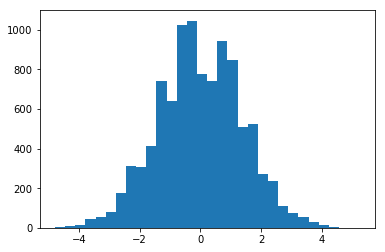

In [7]:
import matplotlib.pyplot as plt
plt.hist(all_difs,30)
plt.show()

In [8]:
#calculate significance
orig_meandif = stats.loc['mean','beer'] - stats.loc['mean','water']
num_obs_higher = [x for x in all_difs if x >= orig_meandif]
signif = len(num_obs_higher) / len(all_difs)
print('Original Mean Difference: ',orig_meandif)
print('Average Mean Difference from 10,000 random samples: ', sum(all_difs)/len(all_difs))
print('Significance: ', signif)

Original Mean Difference:  4.37777777778
Average Mean Difference from 10,000 random samples:  -0.00842288888889
Significance:  0.0006


# Conclusion
The original average difference of 4.37 is statistically significant (in 10,000 random samples, less than 1% had an average difference that was equal to or higher than the 4.37)

We can reject the Null Hypothesis. Beer seems to attract mosquitos!
